In [19]:
import pandas as pd
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\JENNIFER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [21]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [22]:
df = pd.DataFrame(documents, columns=['words', 'category'])

In [23]:
print(df.head())

                                               words category
0  [plot, :, two, teen, couples, go, to, a, churc...      neg
1  [the, happy, bastard, ', s, quick, movie, revi...      neg
2  [it, is, movies, like, these, that, make, a, j...      neg
3  [", quest, for, camelot, ", is, warner, bros, ...      neg
4  [synopsis, :, a, mentally, unstable, man, unde...      neg


In [24]:
print(df.tail())

                                                  words category
1995  [wow, !, what, a, movie, ., it, ', s, everythi...      pos
1996  [richard, gere, can, be, a, commanding, actor,...      pos
1997  [glory, --, starring, matthew, broderick, ,, d...      pos
1998  [steven, spielberg, ', s, second, epic, film, ...      pos
1999  [truman, (, ", true, -, man, ", ), burbank, is...      pos


In [25]:
print(df.value_counts("category"))

category
neg    1000
pos    1000
Name: count, dtype: int64


In [26]:
# Download NLTK resources if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Import stopwords and PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize PorterStemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a function for text preprocessing
def preprocess_text(words):
    processed_words = []
    for word in words:
        if word.isalpha() and word.lower() not in stop_words:
            processed_words.append(ps.stem(word.lower()))
    return processed_words

# Apply text preprocessing to each row in the DataFrame
df['processed_words'] = df['words'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JENNIFER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JENNIFER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
df['processed_text'] = df['processed_words'].apply(lambda x: ' '.join(x))

In [28]:
df

,words,category,processed_words,processed_text
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg,"[plot, two, teen, coupl, go, church, parti, dr...",plot two teen coupl go church parti drink driv...
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg,"[happi, bastard, quick, movi, review, damn, bu...",happi bastard quick movi review damn bug got h...
2,"[it, is, movies, like, these, that, make, a, j...",neg,"[movi, like, make, jade, movi, viewer, thank, ...",movi like make jade movi viewer thank invent t...
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg,"[quest, camelot, warner, bro, first, featur, l...",quest camelot warner bro first featur length f...
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg,"[synopsi, mental, unstabl, man, undergo, psych...",synopsi mental unstabl man undergo psychothera...
...,...,...,...,...
1995,"[wow, !, what, a, movie, ., it, ', s, everythi...",pos,"[wow, movi, everyth, movi, funni, dramat, inte...",wow movi everyth movi funni dramat interest we...
1996,"[richard, gere, can, be, a, commanding, actor,...",pos,"[richard, gere, command, actor, alway, great, ...",richard gere command actor alway great film ev...
1997,"[glory, --, starring, matthew, broderick, ,, d...",pos,"[glori, star, matthew, broderick, denzel, wash...",glori star matthew broderick denzel washington...
1998,"[steven, spielberg, ', s, second, epic, film, ...",pos,"[steven, spielberg, second, epic, film, world,...",steven spielberg second epic film world war ii...


In [29]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Vectorize the preprocessed text data
X = vectorizer.fit_transform(df['processed_text']).toarray()

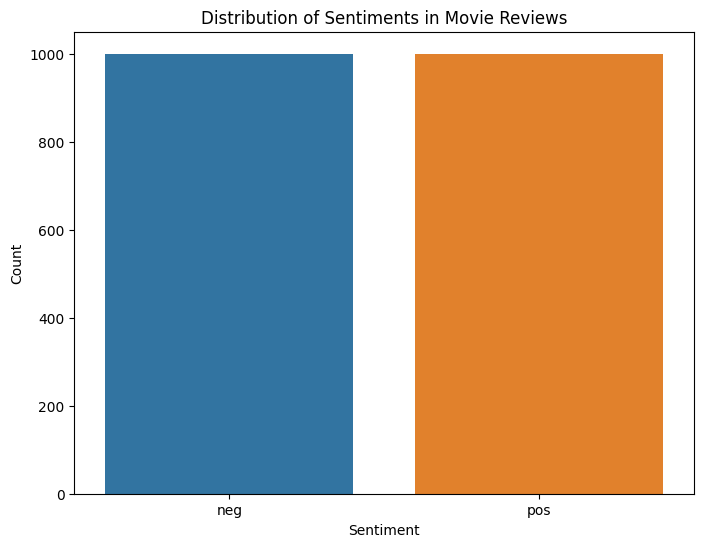

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Sentiments in Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8075
Classification Report:
              precision    recall  f1-score   support

         neg       0.80      0.81      0.81       199
         pos       0.81      0.80      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [34]:
print(model.predict(vectorizer.transform(['I thought it will be an interesting movie, but it ended up to be boring'])))

['neg']


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best model:", accuracy)

print("Classification Report with best model:")
print(classification_report(y_test, y_pred))


Best parameters: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score: 0.8162499999999999
Accuracy with best model: 0.8075
Classification Report with best model:
              precision    recall  f1-score   support

         neg       0.80      0.81      0.81       199
         pos       0.81      0.80      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8075
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         neg       0.80      0.81      0.81       199
         pos       0.81      0.80      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

Support Vector Machine Accuracy: 0.8025
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         neg       0.81      0.79      0.80       199
         pos       0.80      0.81      0.80       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

Random Forest Accuracy: 0.795
Random Forest Classification Report:
              precision    recall  f1-score   support

         neg       0.76      0.85      0.80       199
    